In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeSingularA(3, 2, delta = .00010)

[[0.25176998 0.23709687 0.51083321]
 [0.37185505 0.16449214 0.46335287]
 [0.42746488 0.27633226 0.29590293]]


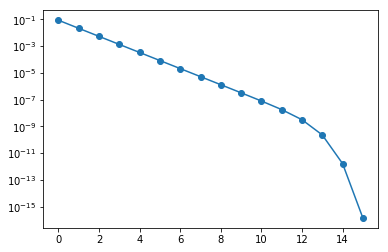

In [3]:
Ss = shf.NewtonPoly(A)
# Ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 10 * np.eye(3))
ax = plt.subplot(111)
ax.semilogy(Ss['errs'],'-o')
print(Ss['sol'])

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[-0.6667     -1.23857211 -1.09472789 -0.6667     -1.23857211 -1.09472789 -0.6667     -1.23857211 -1.09472789]
[[-0.57735027 -0.69466261  0.49289981  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027 -0.17734871 -0.86682445  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027  0.69713076  0.07526723  0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027 -0.69466261  0.49289981  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027 -0.17734871 -0.86682445  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027  0.69713076  0.07526723  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027 -0.69466261  0.49289981]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027 -0.17734871 -0.86682445]
 [

In [5]:
coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

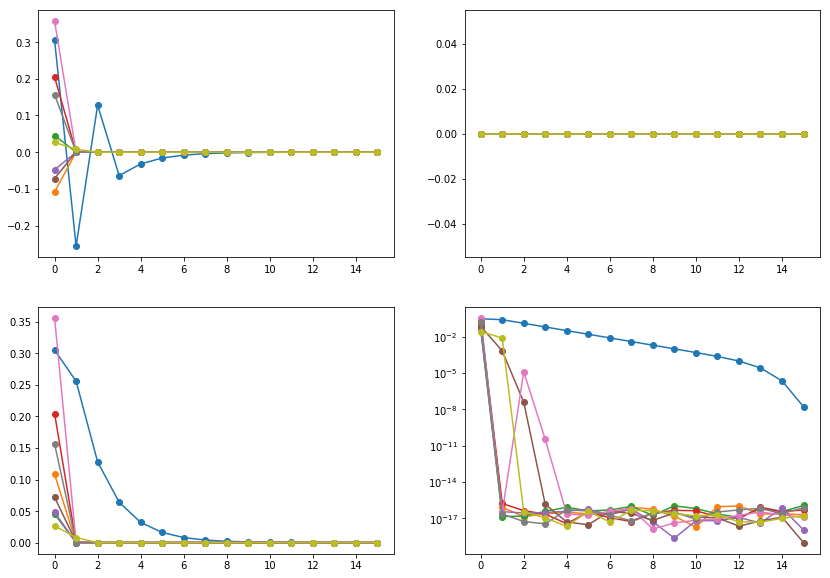

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

In [7]:
# X_{i}에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['Xs'])):
    d, ev = nla.eig(Ss['Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[ 0.499925   -0.19261867 -0.08653099]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.74988749 -0.20033451 -0.08718804]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.87486872 -0.20034693 -0.08718808]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.93735928 -0.20034693 -0.08718808]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.96860448 -0.20034693 -0.08718808]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.98422689 -0.20034693 -0.08718808]
[[-0.57735027 -0.69466261  0.49289981]
 [-0.57735027 -0.17734871 -0.86682445]
 [-0.57735027  0.69713076  0.07526723]]
[ 0.99203774 -0.

In [8]:
for i in range(len(EVs)-1):
    Pre, Nex = EVs[i], EVs[i+1]
    for j in range(Pre.shape[1]):
        if np.sign(np.real(Pre[0,j])) != np.sign(np.real(Nex[0,j])):
            Nex[:,j] = -Nex[:,j]
    print(nla.norm(Pre - Nex, 'fro'))

2.1543297108347814
1.2697986255469777e-15
1.2722987535392274e-15
1.7722864176822952e-15
1.5891127534195122e-15
1.6674149056900666e-15
1.4812222630807097e-15
1.541371849813047e-15
1.6723166184202995e-15
8.632162507062883e-16
9.698578168158083e-16
8.355534721610419e-16
2.275661008907706e-15
2.7553962389770593e-15
1.7244233337941968e-15
7.738033469234878e-16


In [9]:
B = np.zeros(A.shape)
B = B.astype(np.complex128)
for i in range(A.shape[0]):
    B[i,:,:] = np.dot(A[i,:,:], EVs[-1])
if np.sum(np.iscomplex(B)) == 0:
    B = B.astype(np.float64)
B

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[[ 0.19243084, -0.16572713,  0.04669136],
        [ 0.19243084, -0.04231046, -0.08211245],
        [ 0.19243084,  0.16631596,  0.00712991]],

       [[-0.38491942, -0.86038974,  0.53959116],
        [-0.38491942, -0.21965917, -0.9489369 ],
        [-0.38491942,  0.86344671,  0.08239714]],

       [[ 0.19248858, -0.16565766,  0.04664207],
        [ 0.19248858, -0.04229272, -0.08202577],
        [ 0.19248858,  0.16624624,  0.00712238]]])

In [10]:
BSs = shf.NewtonPoly(B)

In [11]:
d, v = nla.eig(BSs['sol'])
BSs['sol'][abs(BSs['sol']) < 1e-15] = 0
d[abs(d) < 1e-15] = 0
v[abs(v) < 1e-15] = 0
print(BSs['sol'])
print(d)
print(v)

[[ 0.99970006  0.          0.        ]
 [ 0.         -0.20034693  0.        ]
 [ 0.          0.         -0.08718808]]
[ 0.99970006 -0.20034693 -0.08718808]
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
